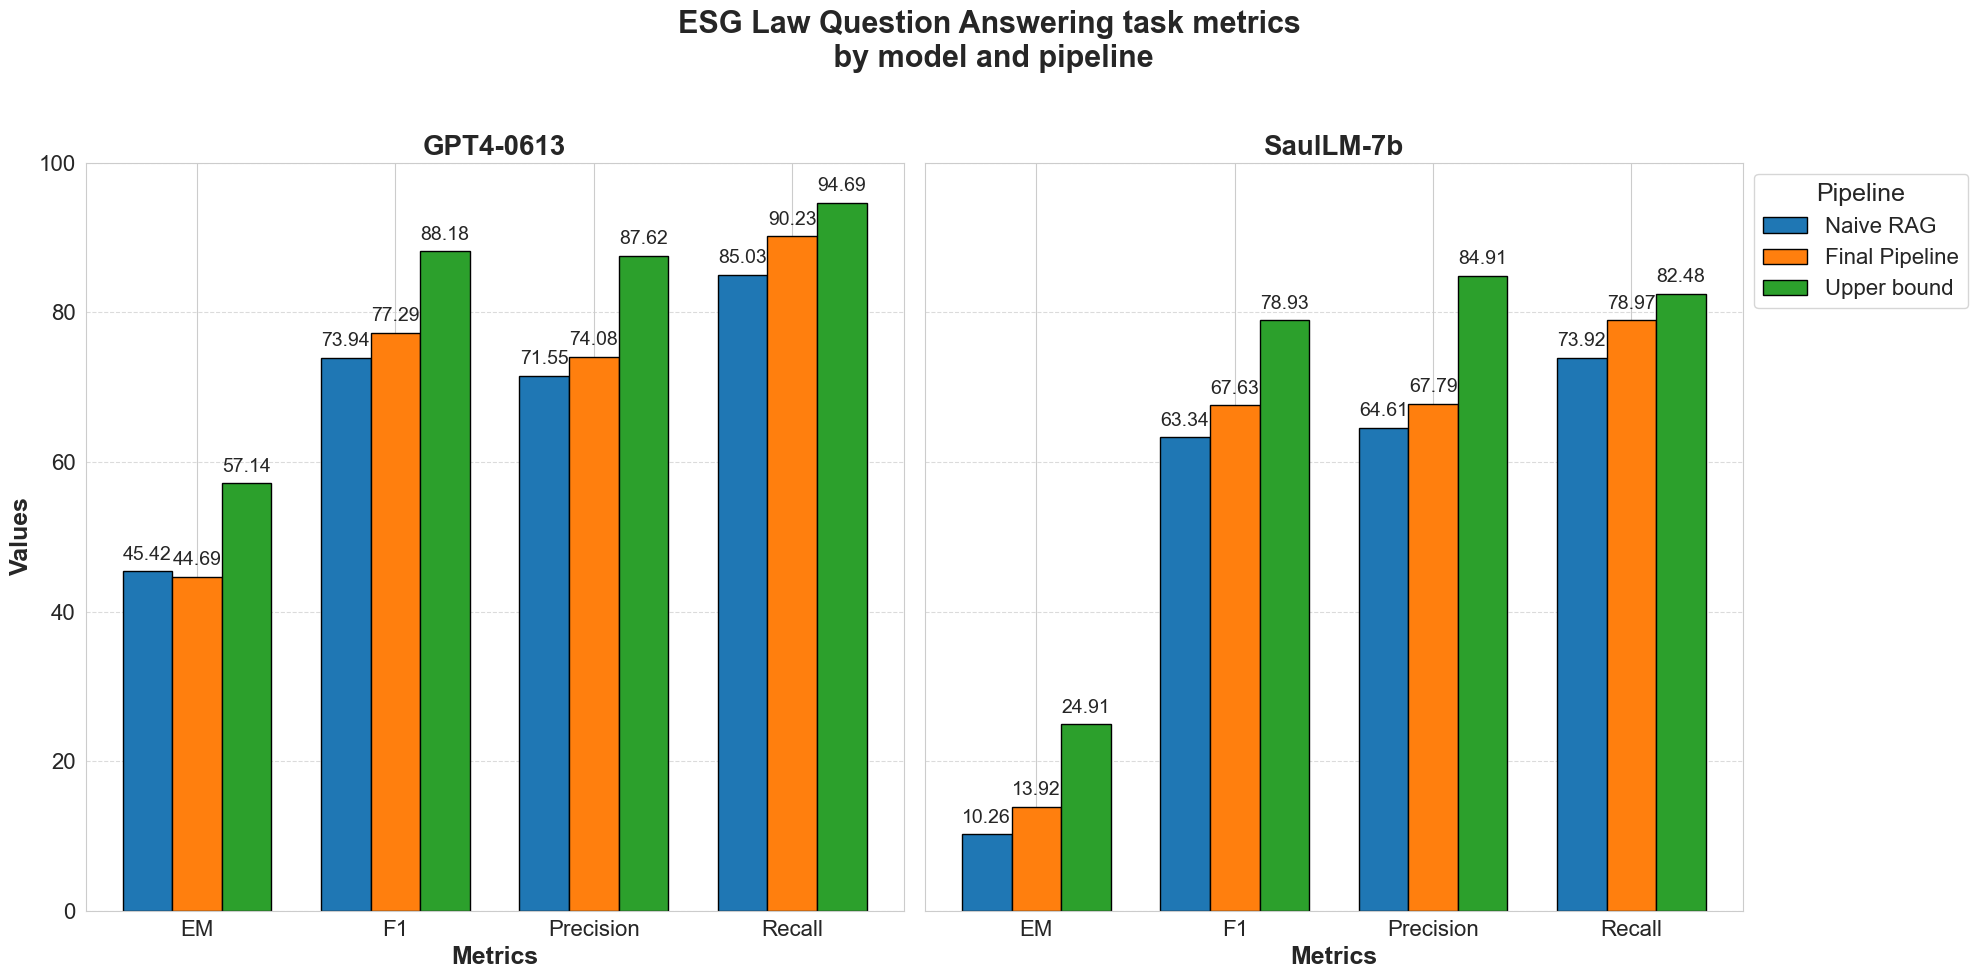

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['GPT4-0613', 'SaulLM-7b']
pipelines = ['Naive RAG', 'Final Pipeline', 'Upper bound']
metrics = ['EM', 'F1', 'Precision', 'Recall']

# Values
values = {
    'GPT4-0613': {
        'Upper bound': [57.14, 88.18, 87.62, 94.69],
        'Naive RAG': [45.42, 73.94, 71.55, 85.03],
        'Final Pipeline': [44.69, 77.29, 74.08, 90.23]
    },
    'SaulLM-7b': {
        'Upper bound': [24.91, 78.93, 84.91, 82.48],
        'Naive RAG': [10.26, 63.34, 64.61, 73.92],
        'Final Pipeline': [13.92, 67.63, 67.79, 78.97]
    }
}

# Colors and patterns for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
hatches = ['/', '\\', 'x']

# Plotting
fig, axs = plt.subplots(1, len(models), figsize=(20, 10), sharey=True)

for i, model in enumerate(models):
    ax = axs[i]
    bar_width = 0.25
    indices = np.arange(len(metrics))

    for j, pipeline in enumerate(pipelines):
        bars = ax.bar(indices + j * bar_width, values[model][pipeline], bar_width, label=pipeline,
                      color=colors[j], edgecolor='black') #hatch=hatches[j], edgecolor='black')
        # Add data labels
        for bar in bars:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.2f}', ha='center', va='bottom', fontsize=14)

    ax.set_title(model, fontsize=20, fontweight='bold')
    ax.set_xticks(indices + bar_width)
    ax.set_xticklabels(metrics, fontsize=16)
    ax.set_xlabel('Metrics', fontsize=18, fontweight='bold')
    ax.set_ylim(0, 100)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.tick_params(axis='both', which='major', labelsize=16)
    if i == 0:
        ax.set_ylabel('Values', fontsize=18, fontweight='bold')
    if i == len(models) - 1:
        ax.legend(title='Pipeline', title_fontsize='18', fontsize=16, loc='upper left', bbox_to_anchor=(1, 1))

plt.suptitle('ESG Law Question Answering task metrics\n by model and pipeline', fontsize=22, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

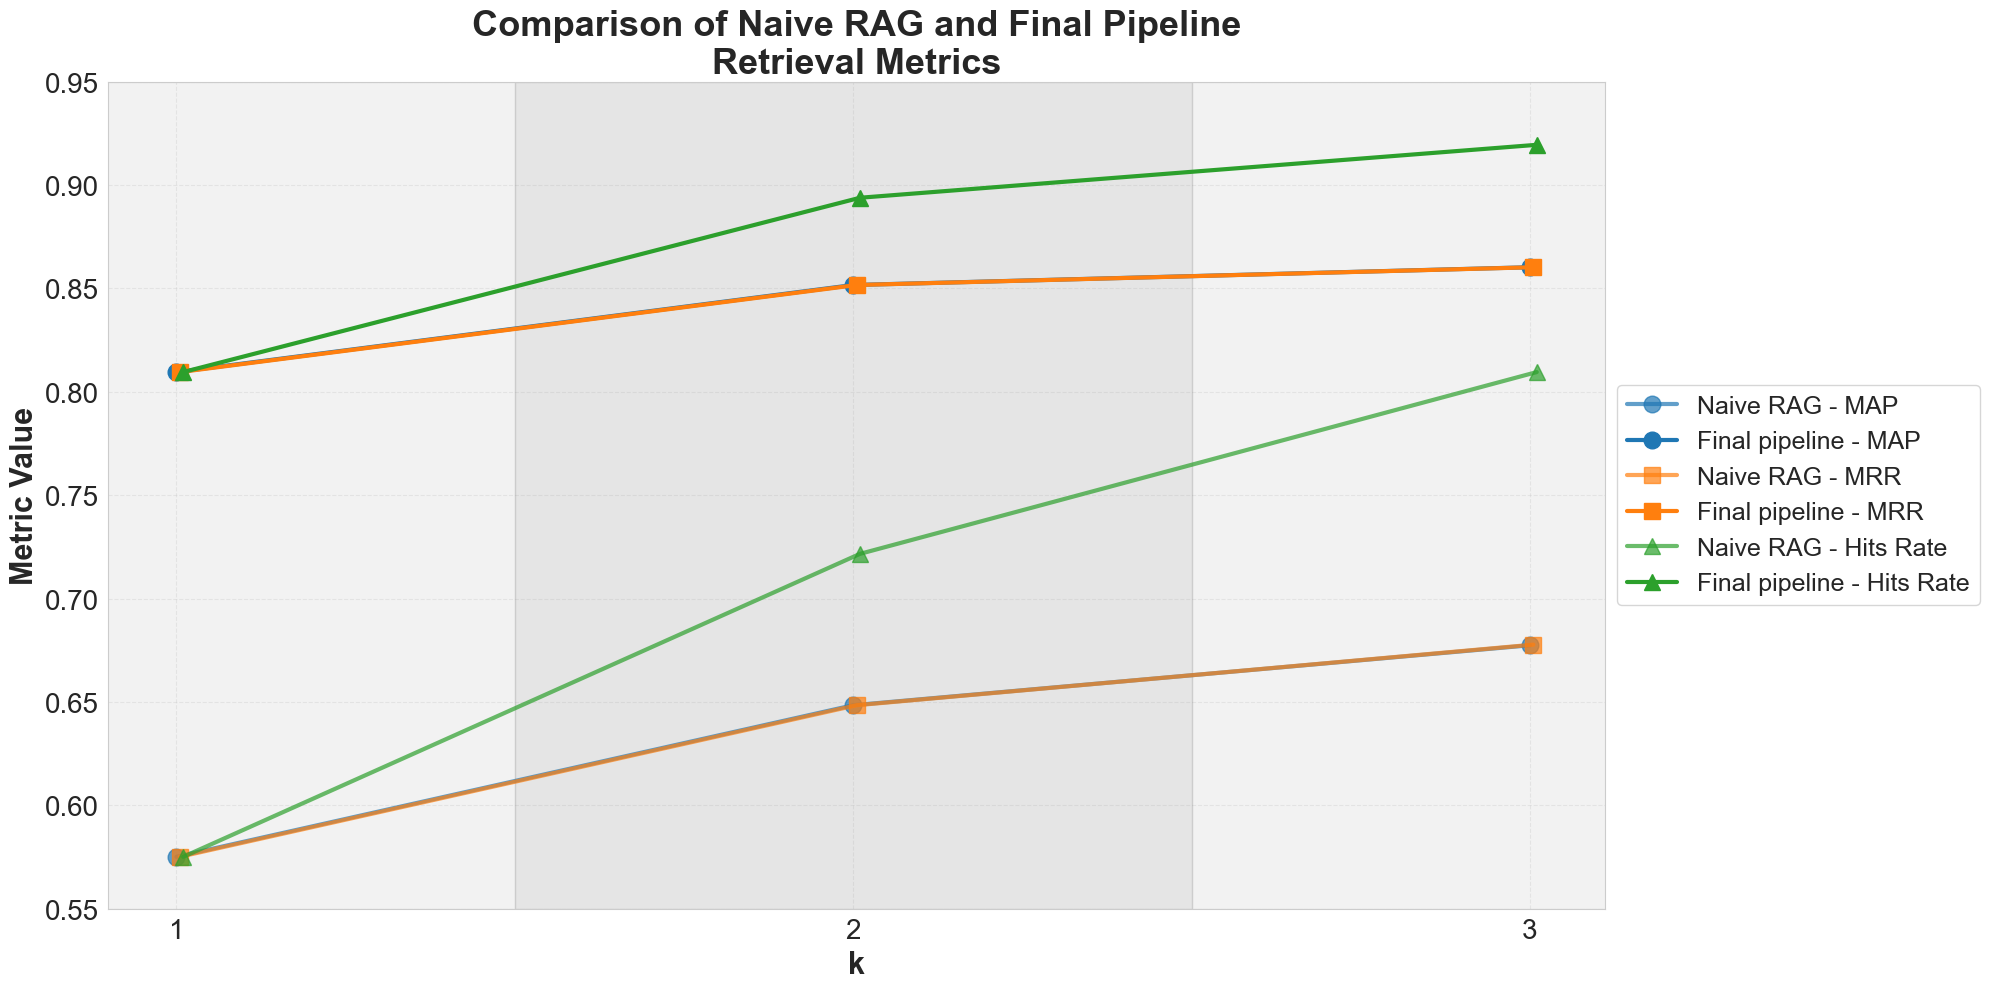

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data from the table
data = {
    'k': [1, 2, 3],
    'Naive RAG MAP': [0.5751, 0.6484, 0.6774],
    'Final pipeline MAP': [0.8095, 0.8516, 0.8602],
    'Naive RAG MRR': [0.5751, 0.6484, 0.6777],
    'Final pipeline MRR': [0.8095, 0.8516, 0.8602],
    'Naive RAG Hits Rate': [0.5751, 0.7216, 0.8095],
    'Final pipeline Hits Rate': [0.8095, 0.8938, 0.9194]
}

df = pd.DataFrame(data)

# Set up the plot style
plt.style.use('default')
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(20, 10))  # Increased figure size

# Color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green

# Create the line plot
metrics = ['MAP', 'MRR', 'Hits Rate']
markers = ['o', 's', '^']

for i, metric in enumerate(metrics):
    offset = i * 0.005  # Offset for better visibility
    ax.plot(df['k'] + offset, df[f'Naive RAG {metric}'], label=f'Naive RAG - {metric}',
            color=colors[i], marker=markers[i], linewidth=3, markersize=12, linestyle='-', alpha=0.7)
    ax.plot(df['k'] + offset, df[f'Final pipeline {metric}'], label=f'Final pipeline - {metric}',
            color=colors[i], marker=markers[i], linewidth=3, markersize=12, linestyle='-', alpha=1.0)

# Customize the plot
ax.set_xlabel('k', fontsize=22, fontweight='bold')
ax.set_ylabel('Metric Value', fontsize=22, fontweight='bold')
ax.set_title('Comparison of Naive RAG and Final Pipeline\nRetrieval Metrics', fontsize=26, fontweight='bold')
ax.legend(fontsize=18, loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid(True, which="both", ls="--", alpha=0.3)

# Customize tick labels
ax.set_xticks(df['k'])
ax.set_xticklabels(df['k'], fontsize=20)
ax.tick_params(axis='y', labelsize=20)

# Set y-axis limits
ax.set_ylim(0.55, 0.95)

# Add shaded regions to group k values
ax.axvspan(0.5, 1.5, alpha=0.1, color='gray')
ax.axvspan(1.5, 2.5, alpha=0.2, color='gray')
ax.axvspan(2.5, 3.5, alpha=0.1, color='gray')

plt.tight_layout()
plt.savefig('improved_pipeline_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

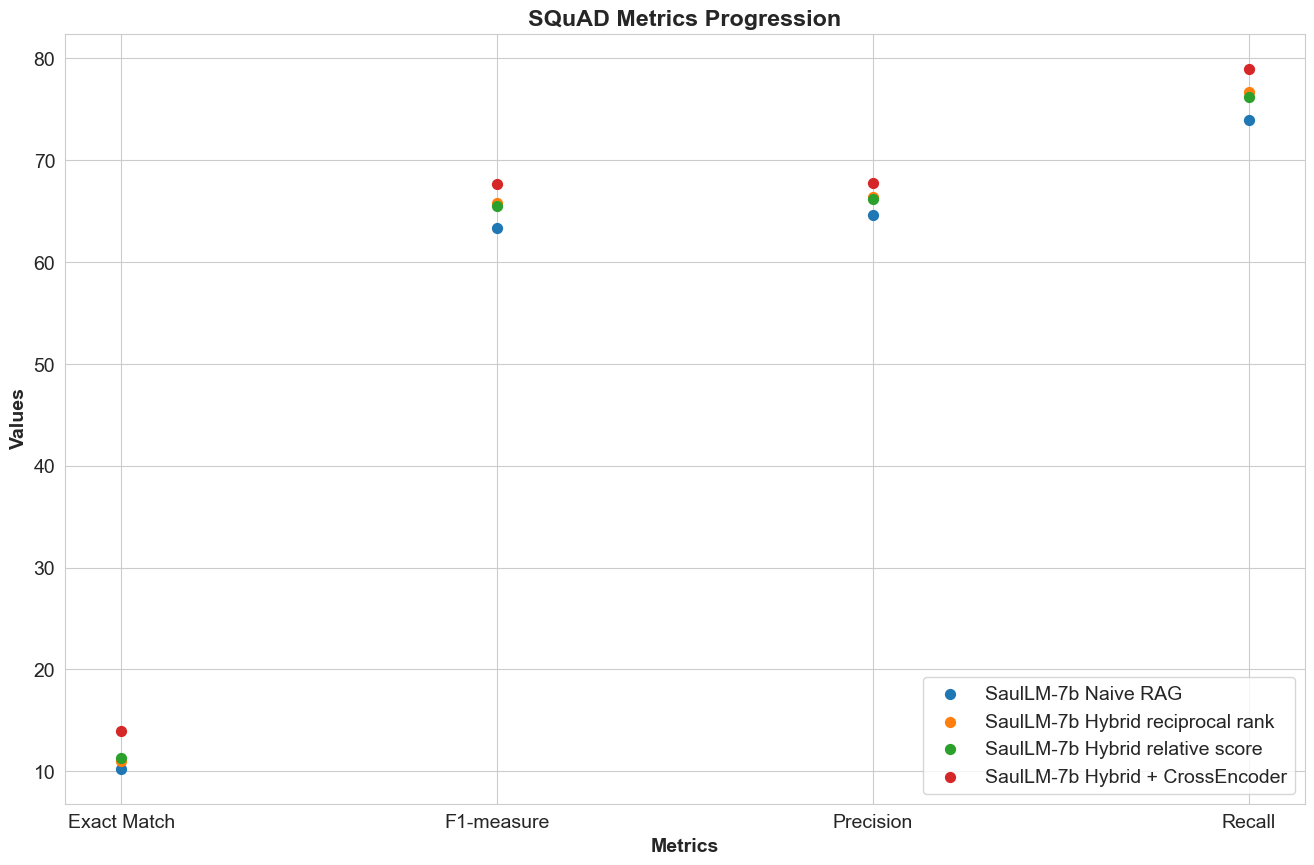

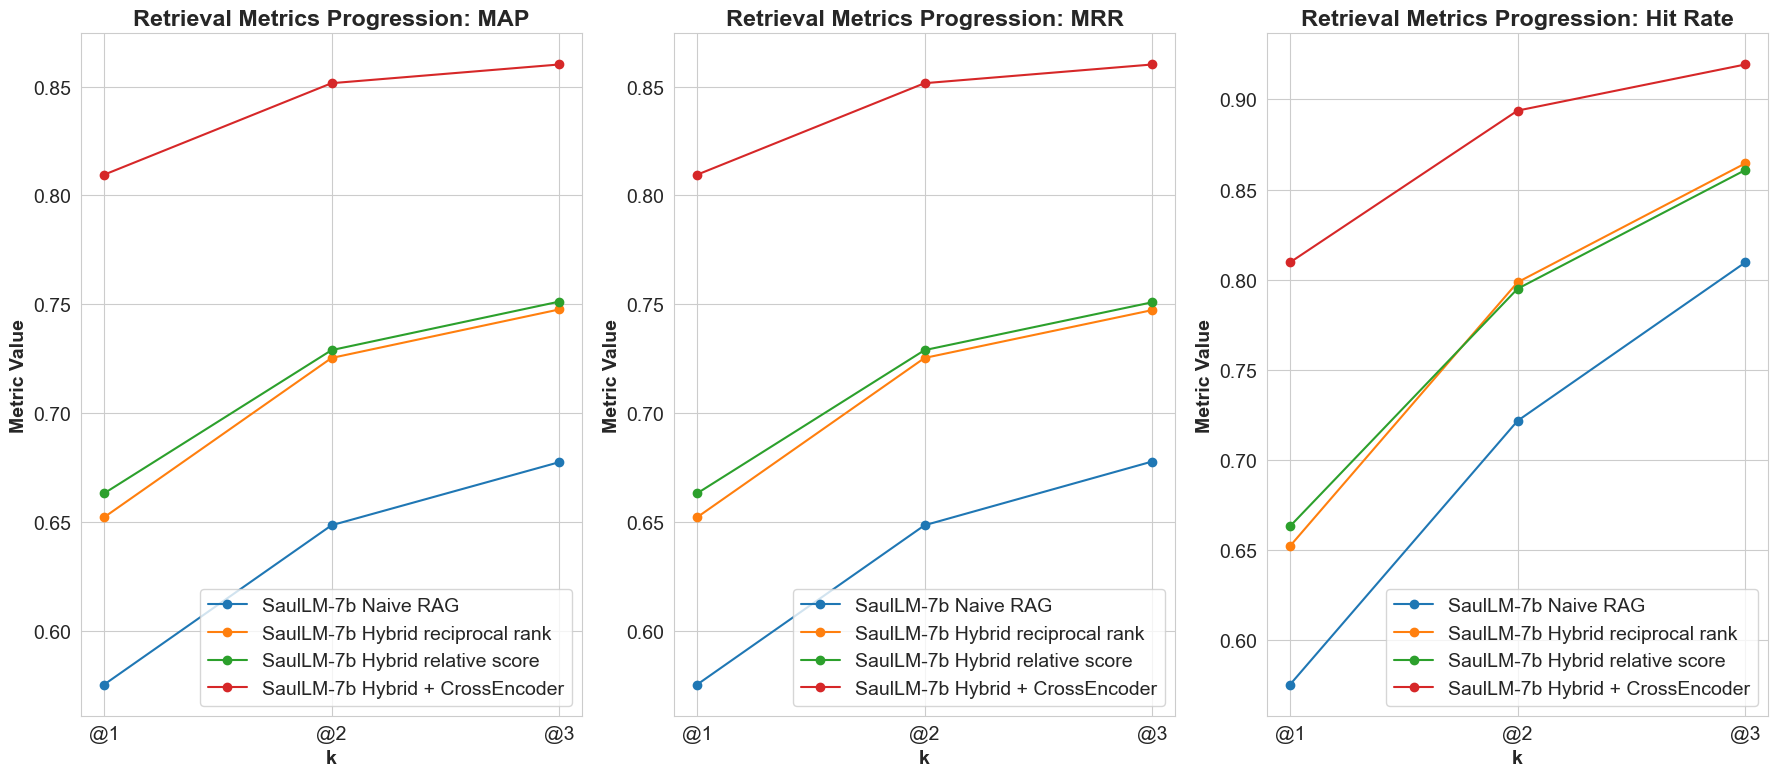

In [5]:
import matplotlib.pyplot as plt

# Updated Data for SQuAD metrics
squad_metrics = {
    'SaulLM-7b Naive RAG': [10.256, 63.342, 64.608, 73.919],
    'SaulLM-7b Hybrid reciprocal rank': [10.989, 65.762, 66.349, 76.660],
    'SaulLM-7b Hybrid relative score': [11.355, 65.495, 66.150, 76.172],
    'SaulLM-7b Hybrid + CrossEncoder': [13.919, 67.629, 67.787, 78.973]
}
squad_labels = ['Exact Match', 'F1-measure', 'Precision', 'Recall']

# Updated Data for Retrieval metrics
retrieval_metrics = {
    'SaulLM-7b Naive RAG': [
        {'MAP': 0.5751, 'MRR': 0.5751, 'Hit Rate': 0.5751},
        {'MAP': 0.6484, 'MRR': 0.6484, 'Hit Rate': 0.7216},
        {'MAP': 0.6774, 'MRR': 0.6777, 'Hit Rate': 0.8095}
    ],
    'SaulLM-7b Hybrid reciprocal rank': [
        {'MAP': 0.6520, 'MRR': 0.6520, 'Hit Rate': 0.6520},
        {'MAP': 0.7253, 'MRR': 0.7253, 'Hit Rate': 0.7985},
        {'MAP': 0.7476, 'MRR': 0.7473, 'Hit Rate': 0.8645}
    ],
    'SaulLM-7b Hybrid relative score': [
        {'MAP': 0.6630, 'MRR': 0.6630, 'Hit Rate': 0.6630},
        {'MAP': 0.7289, 'MRR': 0.7289, 'Hit Rate': 0.7949},
        {'MAP': 0.7512, 'MRR': 0.7509, 'Hit Rate': 0.8608}
    ],
    'SaulLM-7b Hybrid + CrossEncoder': [
        {'MAP': 0.8095, 'MRR': 0.8095, 'Hit Rate': 0.8095},
        {'MAP': 0.8516, 'MRR': 0.8516, 'Hit Rate': 0.8938},
        {'MAP': 0.8602, 'MRR': 0.8602, 'Hit Rate': 0.9194}
    ]
}
retrieval_labels = ['@1', '@2', '@3']

plt.rcParams.update({'font.size': 14})

# Plotting SQuAD metrics
plt.figure(figsize=(16, 10))
for approach, metrics in squad_metrics.items():
    plt.scatter(squad_labels, metrics, marker='o', label=approach, s=50)

plt.title('SQuAD Metrics Progression', fontweight='bold')
plt.xlabel('Metrics', fontweight='bold')
plt.ylabel('Values', fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotting Retrieval metrics
metrics_keys = ['MAP', 'MRR', 'Hit Rate']
fig, axes = plt.subplots(1, 3, figsize=(18, 8))

for idx, metric_key in enumerate(metrics_keys):
    ax = axes[idx]
    for approach, metrics in retrieval_metrics.items():
        values = [m[metric_key] for m in metrics]
        ax.plot(retrieval_labels, values, marker='o', label=approach)

    ax.set_title(f'Retrieval Metrics Progression: {metric_key}', fontweight='bold')
    ax.set_xlabel('k', fontweight="bold")
    ax.set_ylabel('Metric Value', fontweight="bold")
    ax.legend(loc='lower right')
    ax.grid(True)

plt.tight_layout()
plt.show()
